# Importing Libraries

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
!pip install tensorflow

# Test set Image Processing

In [30]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [31]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

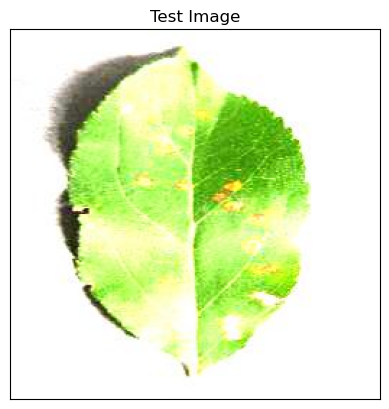

In [37]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 3.7 MB/s eta 0:00:11
   -- ------------------------------------- 2.6/39.5 MB 7.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/39.5 MB 6.2 MB/s eta 0:00:06
   ----- ---------------------------------- 5.0/39.5 MB 6.4 MB/s eta 0:00:06
   ------- -------------------------------- 7.3/39.5 MB 7.4 MB/s eta 0:00:05
   ---------- ----------------------------- 10.2/39.5 MB 8.5 MB/s eta 0:00:04
   ------------- -------------------------- 13.4/39.5 MB 9.6 MB/s eta 0:00:03
   ---------------- ----------------------- 16.3/39.5 MB 10.2 MB/s eta 0:00:03
   ------------------- -------------------- 19.7/39.5 MB 10.9 MB/s eta 0:00:02
   ----------------------- ---------------- 23.3/39.5 MB 11.6 MB/s eta 0:00:02
   --------------------------- ------------ 26.7/39.5 MB 12.0 MB/s eta 0:00:02
   ------------------------------ --------- 29.9/39.5 MB 12.3 MB/s eta 0:

## Testing Model

In [33]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [34]:
print(predictions)

[[4.3206261e-18 1.6055278e-17 1.0000000e+00 6.0240832e-22 3.2652886e-18
  7.5243192e-20 4.9601904e-23 1.9760874e-21 2.2341890e-24 4.1325341e-25
  1.5425098e-30 7.2451548e-20 2.8652266e-21 9.4256462e-24 9.3341056e-19
  4.4810268e-21 4.2678261e-20 3.9781385e-22 1.6843761e-18 1.2352750e-20
  4.8968939e-21 1.4518656e-21 2.0000094e-18 5.9793465e-22 1.4120669e-23
  1.5465462e-22 3.2730671e-20 4.1941249e-24 1.2661799e-14 3.4510849e-13
  5.6586825e-14 7.4357052e-17 5.5021756e-14 1.8618363e-22 8.6538544e-15
  1.3638457e-19 8.2727814e-18 1.4829168e-18]]


In [35]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


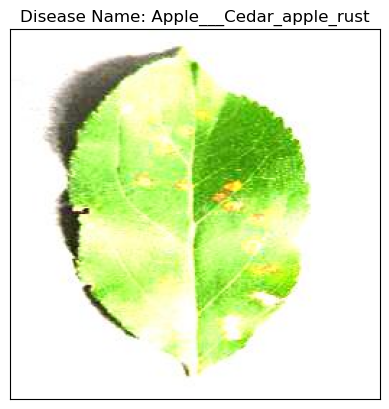

In [38]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()